**Sobel Edge Detection**

In [ ]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow


In [ ]:
def custom_sobel(image):
    sobel_x = np.array([[-1, 0, 1],
                        [-2, 0, 2],
                        [-1, 0, 1]])

    sobel_y = np.array([[-1, -2, -1],
                        [ 0,  0,  0],
                        [ 1,  2,  1]])

    grad_x = cv2.filter2D(image, -1, sobel_x)
    grad_y = cv2.filter2D(image, -1, sobel_y)

    gradient_magnitude = np.sqrt(np.square(grad_x) + np.square(grad_y))
    gradient_magnitude = np.uint8(255 * gradient_magnitude / np.max(gradient_magnitude))

    return grad_x, grad_y, gradient_magnitude

In [ ]:
image = cv2.imread('/content/Screenshot 2024-09-23 082432.png', cv2.IMREAD_GRAYSCALE)

In [ ]:
grad_x, grad_y, gradient_magnitude = custom_sobel(image)


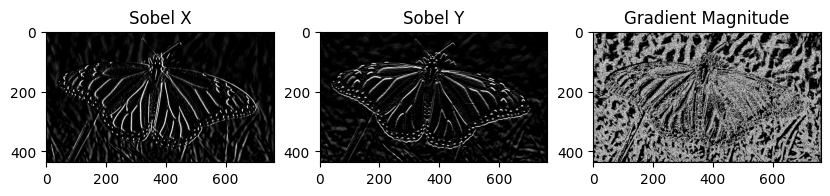

In [ ]:
plt.figure(figsize=(10, 7))
plt.subplot(1, 3, 1)
plt.title('Sobel X')
plt.imshow(grad_x, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('Sobel Y')
plt.imshow(grad_y, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Gradient Magnitude')
plt.imshow(gradient_magnitude, cmap='gray')

plt.show()

**canny edge detection**


In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [1]:
def gaussian_blur(image, kernel_size=5, sigma=1):
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), sigma)

In [2]:
def gaussian_blur(image, kernel_size=5, sigma=1):
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), sigma)

In [4]:
def compute_gradients(image):
    I_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    I_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

    gradient_magnitude = np.sqrt(I_x**2 + I_y**2)
    gradient_direction = np.arctan2(I_y, I_x)

    return gradient_magnitude, gradient_direction

In [7]:
def non_maximum_suppression(gradient_magnitude, gradient_direction):
    height, width = gradient_magnitude.shape
    suppressed_image = np.zeros((height, width), dtype=np.float32)

    angle = np.rad2deg(gradient_direction) % 180

    for i in range(1, height - 1):
        for j in range(1, width - 1):
            q = 255
            r = 255

            if (0 <= angle[i, j] < 22.5) or (157.5 <= angle[i, j] <= 180):
                q = gradient_magnitude[i, j + 1]
                r = gradient_magnitude[i, j - 1]
            elif 22.5 <= angle[i, j] < 67.5:
                q = gradient_magnitude[i + 1, j - 1]
                r = gradient_magnitude[i - 1, j + 1]
            elif 67.5 <= angle[i, j] < 112.5:
                q = gradient_magnitude[i + 1, j]
                r = gradient_magnitude[i - 1, j]
            elif 112.5 <= angle[i, j] < 157.5:
                q = gradient_magnitude[i - 1, j - 1]
                r = gradient_magnitude[i + 1, j + 1]

            if gradient_magnitude[i, j] >= q and gradient_magnitude[i, j] >= r:
                suppressed_image[i, j] = gradient_magnitude[i, j]
            else:
                suppressed_image[i, j] = 0

    return suppressed_image

In [8]:
def threshold_hysteresis(image, low_threshold, high_threshold):
    strong_edges = (image > high_threshold).astype(np.uint8)
    weak_edges = ((image >= low_threshold) & (image <= high_threshold)).astype(np.uint8)

    final_image = np.zeros_like(image)
    strong_value = 255
    weak_value = 75

    final_image[strong_edges == 1] = strong_value

    height, width = image.shape
    for i in range(1, height - 1):
        for j in range(1, width - 1):
            if weak_edges[i, j] == 1:
                if (strong_edges[i + 1, j - 1] == 1 or strong_edges[i + 1, j] == 1 or strong_edges[i + 1, j + 1] == 1
                        or strong_edges[i, j - 1] == 1 or strong_edges[i, j + 1] == 1
                        or strong_edges[i - 1, j - 1] == 1 or strong_edges[i - 1, j] == 1 or strong_edges[i - 1, j + 1] == 1):
                    final_image[i, j] = strong_value
                else:
                    final_image[i, j] = 0
            elif strong_edges[i, j] == 1:
                final_image[i, j] = strong_value

    return final_image

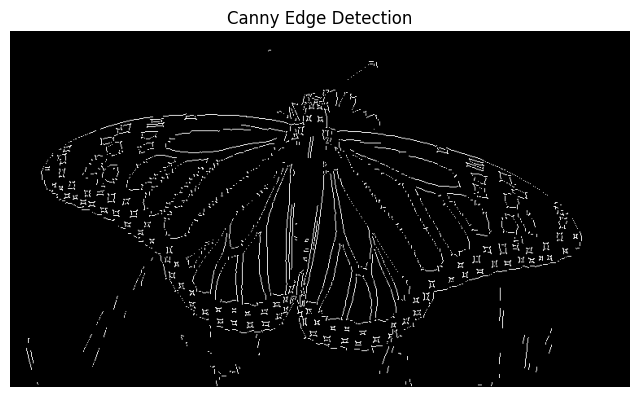

In [11]:
def canny_edge_detection(image_path, low_threshold=50, high_threshold=150):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    blurred_image = gaussian_blur(image)

    gradient_magnitude, gradient_direction = compute_gradients(blurred_image)

    suppressed_image = non_maximum_suppression(gradient_magnitude, gradient_direction)

    final_edges = threshold_hysteresis(suppressed_image, low_threshold, high_threshold)

    plt.figure(figsize=(8, 6))
    plt.imshow(final_edges, cmap='gray')
    plt.title('Canny Edge Detection')
    plt.axis('off')
    plt.show()

canny_edge_detection('/content/Screenshot 2024-09-23 082432.png')